Cat vs Dog Classification Project

In [ ]:
# Dataset - https://www.kaggle.com/datasets/salader/dogs-vs-cats

In [ ]:
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/

In [ ]:
!kaggle datasets download -d salader/dogs-vs-cats

 98% 1.05G/1.06G [00:10<00:00, 120MB/s]
100% 1.06G/1.06G [00:10<00:00, 106MB/s]


In [ ]:
!chmod 600 /root/.kaggle/kaggle.json

In [ ]:
# Unzip the file
import zipfile
zip_ref = zipfile.ZipFile('/content/dogs-vs-cats.zip', 'r')
zip_ref.extractall('/content')
zip_ref.close()

In [ ]:
# Import required libraries
import tensorflow as tf
from tensorflow import keras
from keras.models import Sequential
from keras.layers import Conv2D, MaxPool2D, Flatten, Dense

In [ ]:
# Generators (Divides data into batches)
# The general use case of using the image_dataset_from_directory is to load the multiple images from the directory and prepare them for training by resizing them to a fixed size. However, when the original size is provided to the function, the image should not be altered.

train_ds = keras.utils.image_dataset_from_directory(
    directory = '/content/train',
    labels = 'inferred',
    label_mode = 'int',
    batch_size = 32,
    image_size = (256,256)

)

validation_ds = keras.utils.image_dataset_from_directory(
    directory = '/content/test',
    labels = 'inferred',
    label_mode = 'int',
    batch_size = 32,
    image_size = (256,256)
)


Found 20000 files belonging to 2 classes.
Found 5000 files belonging to 2 classes.


In [ ]:
# Normalize to 0-1

def process(image, label):
  image = tf.cast(image/255, dtype=tf.float32)
  return image, label

train_ds = train_ds.map(process)
validation_ds = validation_ds.map(process)

In [ ]:
# Create a CNN model
# 3Conv layers (filters = (32,64,128))

model = Sequential()

# 1st Conv layer
model.add(Conv2D(filters=32, kernel_size=(3,3), padding='valid', activation='relu', input_shape=(256, 256, 3)))
model.add(MaxPool2D(pool_size=(2,2), strides=2, padding='valid'))

# 2nd Conv layer
model.add(Conv2D(filters=64, kernel_size=(3,3), padding='valid', activation='relu'))
model.add(MaxPool2D(pool_size=(2,2), strides=2, padding='valid'))

# 3rd Conv layer
model.add(Conv2D(filters=128, kernel_size=(3,3), padding='valid', activation='relu'))
model.add(MaxPool2D(pool_size=(2,2), strides=2, padding='valid'))

# Add Flatten layer
model.add(Flatten())


# Add Fully connected layer
model.add(Dense(units=128, activation='relu'))
model.add(Dense(units=64, activation='relu'))
model.add(Dense(units=1, activation='sigmoid'))


In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 254, 254, 32)      896       
                                                                 
 max_pooling2d (MaxPooling2  (None, 127, 127, 32)      0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 125, 125, 64)      18496     
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 62, 62, 64)        0         
 g2D)                                                            
                                                                 
 conv2d_2 (Conv2D)           (None, 60, 60, 128)       73856     
                                                                 
 max_pooling2d_2 (MaxPoolin  (None, 30, 30, 128)       0

In [ ]:
model.compile(optimizer='adam',loss='binary_crossentropy',metrics=['accuracy'])

In [ ]:
history = model.fit(train_ds, epochs=10, validation_data=validation_ds)

Epoch 1/10
625/625 [==============================] - 62s 85ms/step - loss: 0.6360 - accuracy: 0.6323 - val_loss: 0.5612 - val_accuracy: 0.7048
Epoch 2/10
625/625 [==============================] - 52s 82ms/step - loss: 0.4951 - accuracy: 0.7589 - val_loss: 0.4500 - val_accuracy: 0.7924
Epoch 3/10
625/625 [==============================] - 52s 83ms/step - loss: 0.3958 - accuracy: 0.8175 - val_loss: 0.4554 - val_accuracy: 0.8024
Epoch 4/10
625/625 [==============================] - 50s 80ms/step - loss: 0.2744 - accuracy: 0.8838 - val_loss: 0.5404 - val_accuracy: 0.7922
Epoch 5/10
625/625 [==============================] - 52s 82ms/step - loss: 0.1636 - accuracy: 0.9345 - val_loss: 0.7189 - val_accuracy: 0.7718
Epoch 6/10
625/625 [==============================] - 50s 79ms/step - loss: 0.0998 - accuracy: 0.9629 - val_loss: 1.0675 - val_accuracy: 0.7658
Epoch 7/10
625/625 [==============================] - 49s 78ms/step - loss: 0.0691 - accuracy: 0.9750 - val_loss: 1.0150 - val_accuracy:

In [ ]:
history.history.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

In [ ]:
import matplotlib.pyplot as plt

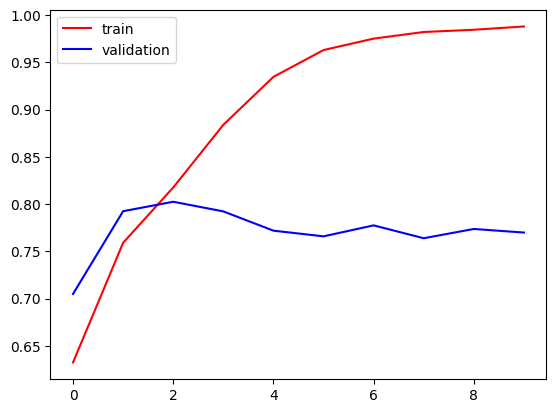

In [ ]:
plt.plot(history.history['accuracy'], color='red', label='train')
plt.plot(history.history['val_accuracy'], color='blue', label='validation')
plt.legend()
plt.show()

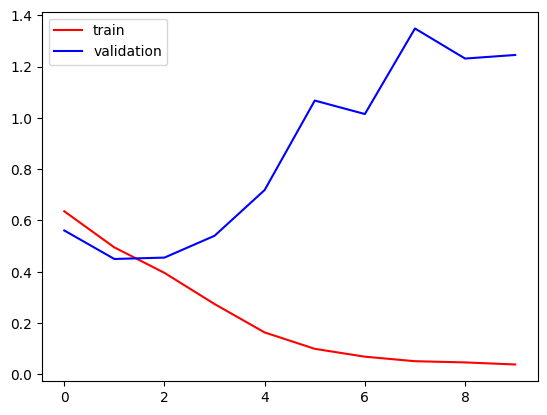

In [ ]:
plt.plot(history.history['loss'], color='red', label='train')
plt.plot(history.history['val_loss'], color='blue', label='validation')
plt.legend()
plt.show()